# Binned_Entropy

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load and visualize data

데이터 셋에 대하여
88가지 종류의 로봇(id = 1~88)이 실행을 성공했을 때(y = True)와 실패했을 때(y = False) 각 실행 마다 15 개(행)의 힘(F) 및 토크(T) 샘플이 제공되며, 이는 x, y 및 z축에 대해 일정한 시간 간격으로 측정되었다. 따라서 데이터 프레임의 각 행은 특정 실행(id), 시간 인덱스(time)를 가지고 6개 센서(F_x, F_y, F_z, T_x, T_y, T_z)의 각 측정을 포함한다.

** y : 로봇 실행이 성공했냐, 실패했냐. True, False로 구분되며 총 88개의 값

** df(x) :

- id : 실행 횟수(1~88번)
- time : 각 실행당 0~14
- F_x, F_y, F_z, T_x, T_y, T_z : 각 실행했을 때 힘(F) 및 토크(T) 센서 값.

In [2]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [3]:
print(timeseries.head())

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0


In [4]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

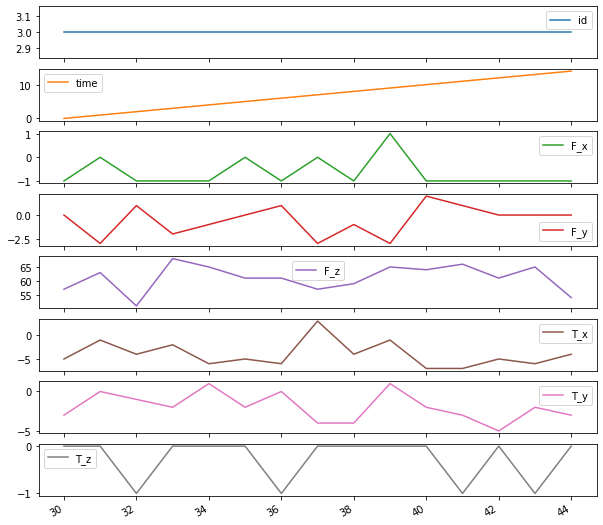

In [5]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

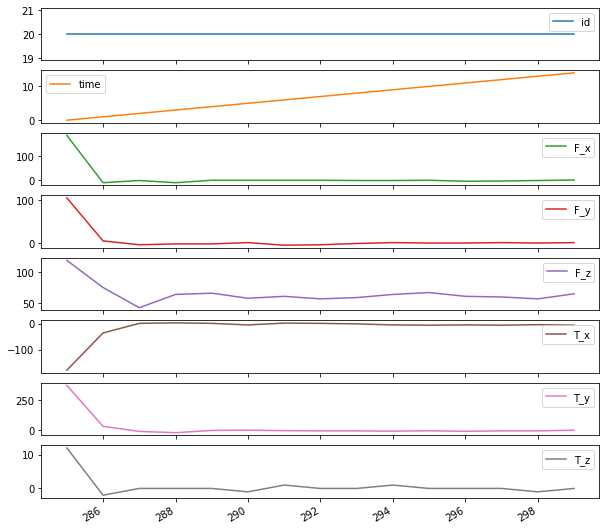

In [6]:
timeseries[timeseries['id'] == 20].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [7]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 48/48 [00:05<00:00,  8.57it/s]


In [8]:
extracted_features

,T_z__variance_larger_than_standard_deviation,T_z__has_duplicate_max,T_z__has_duplicate_min,T_z__has_duplicate,T_z__sum_values,T_z__abs_energy,T_z__mean_abs_change,T_z__mean_change,T_z__mean_second_derivative_central,T_z__median,...,T_y__permutation_entropy__dimension_5__tau_1,T_y__permutation_entropy__dimension_6__tau_1,T_y__permutation_entropy__dimension_7__tau_1,T_y__query_similarity_count__query_None__threshold_0.0,"T_y__matrix_profile__feature_""min""__threshold_0.98","T_y__matrix_profile__feature_""max""__threshold_0.98","T_y__matrix_profile__feature_""mean""__threshold_0.98","T_y__matrix_profile__feature_""median""__threshold_0.98","T_y__matrix_profile__feature_""25""__threshold_0.98","T_y__matrix_profile__feature_""75""__threshold_0.98"
1,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,2.271869,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,1.0,1.0,1.0,-4.0,4.0,0.285714,0.000000,0.038462,0.0,...,2.397895,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,1.0,1.0,1.0,-4.0,4.0,0.571429,0.000000,0.038462,0.0,...,2.397895,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.0,1.0,-5.0,7.0,0.500000,0.071429,-0.038462,0.0,...,2.397895,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,1.0,1.0,1.0,-2.0,6.0,0.357143,-0.071429,0.000000,0.0,...,2.397895,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,1.0,-232.0,4988.0,3.428571,-1.000000,-0.115385,-21.0,...,2.271869,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,1.0,0.0,1.0,1.0,-52.0,250.0,0.500000,-0.500000,0.038462,-2.0,...,2.397895,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1.0,0.0,1.0,1.0,-81.0,885.0,1.785714,1.071429,0.269231,-8.0,...,0.304636,0.325083,0.348832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,1.0,1.0,0.0,1.0,475.0,16513.0,2.500000,2.214286,-0.076923,35.0,...,1.294545,1.497866,1.581094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
extraction_settings = ComprehensiveFCParameters()

X = extract_features(timeseries, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)

Feature Extraction: 100%|██████████| 48/48 [00:05<00:00,  8.39it/s]


In [10]:
X

,T_z__variance_larger_than_standard_deviation,T_z__has_duplicate_max,T_z__has_duplicate_min,T_z__has_duplicate,T_z__sum_values,T_z__abs_energy,T_z__mean_abs_change,T_z__mean_change,T_z__mean_second_derivative_central,T_z__median,...,T_y__permutation_entropy__dimension_5__tau_1,T_y__permutation_entropy__dimension_6__tau_1,T_y__permutation_entropy__dimension_7__tau_1,T_y__query_similarity_count__query_None__threshold_0.0,"T_y__matrix_profile__feature_""min""__threshold_0.98","T_y__matrix_profile__feature_""max""__threshold_0.98","T_y__matrix_profile__feature_""mean""__threshold_0.98","T_y__matrix_profile__feature_""median""__threshold_0.98","T_y__matrix_profile__feature_""25""__threshold_0.98","T_y__matrix_profile__feature_""75""__threshold_0.98"
1,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,2.271869,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,-4.0,4.0,0.285714,0.000000,0.038462,0.0,...,2.397895,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,-4.0,4.0,0.571429,0.000000,0.038462,0.0,...,2.397895,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,-5.0,7.0,0.500000,0.071429,-0.038462,0.0,...,2.397895,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,-2.0,6.0,0.357143,-0.071429,0.000000,0.0,...,2.397895,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,1.0,-232.0,4988.0,3.428571,-1.000000,-0.115385,-21.0,...,2.271869,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,1.0,0.0,1.0,1.0,-52.0,250.0,0.500000,-0.500000,0.038462,-2.0,...,2.397895,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,1.0,0.0,1.0,1.0,-81.0,885.0,1.785714,1.071429,0.269231,-8.0,...,0.304636,0.325083,0.348832,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,1.0,1.0,0.0,1.0,475.0,16513.0,2.500000,2.214286,-0.076923,35.0,...,1.294545,1.497866,1.581094,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 아래 주석을 해제하면 이 세팅에서 뽑히는 특징값 목록들이 나온다.
extraction_settings

{'variance_larger_than_standard_deviation': None,
 'has_duplicate_max': None,
 'has_duplicate_min': None,
 'has_duplicate': None,
 'sum_values': None,
 'abs_energy': None,
 'mean_abs_change': None,
 'mean_change': None,
 'mean_second_derivative_central': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variation_coefficient': None,
 'variance': None,
 'skewness': None,
 'kurtosis': None,
 'root_mean_square': None,
 'absolute_sum_of_changes': None,
 'longest_strike_below_mean': None,
 'longest_strike_above_mean': None,
 'count_above_mean': None,
 'count_below_mean': None,
 'last_location_of_maximum': None,
 'first_location_of_maximum': None,
 'last_location_of_minimum': None,
 'first_location_of_minimum': None,
 'percentage_of_reoccurring_values_to_all_values': None,
 'percentage_of_reoccurring_datapoints_to_all_datapoints': None,
 'sum_of_reoccurring_values': None,
 'sum_of_reoccurring_data_points': None,
 'ratio_value_number_to_time_series_length':

여기서도 binned_entropy를 찾은 뒤 setting으로 설정해서 binned_entropy 값만 뽑아본다

In [13]:
extraction_settings = {'binned_entropy': [{'max_bins': 10}]}

In [14]:
extraction_settings

{'binned_entropy': [{'max_bins': 10}]}

In [15]:
# extraction_settings = ComprehensiveFCParameters()

X2 = extract_features(timeseries, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)

Feature Extraction: 100%|██████████| 48/48 [00:00<00:00, 178.58it/s]


In [16]:
X2

,F_x__binned_entropy__max_bins_10,F_y__binned_entropy__max_bins_10,F_z__binned_entropy__max_bins_10,T_x__binned_entropy__max_bins_10,T_y__binned_entropy__max_bins_10,T_z__binned_entropy__max_bins_10
1,0.244930,0.392674,1.360514,0.392674,0.636514,-0.000000
2,0.990835,1.586785,1.991346,1.933810,1.806507,0.579915
3,0.729871,1.639706,1.933810,1.864044,1.841390,0.579915
4,1.322950,1.679204,1.894312,1.714088,2.176186,0.882311
5,1.020037,1.841390,1.714088,1.933810,1.714088,0.927617
...,...,...,...,...,...,...
84,1.263479,1.841390,1.859429,1.414175,1.656551,1.736741
85,1.806507,1.894312,2.083766,2.118649,2.048883,1.679204
86,2.026230,1.968693,2.026230,2.118649,2.026230,1.621668
87,1.389715,1.635092,1.580236,1.968693,1.898927,1.991346


## Binned_entropy

In [17]:
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [18]:
df2 = timeseries[['id','time','F_z']] #원래 가진 data에서 'id', 'time', 'F_z' 만 뽑아서 df2로 설정

In [19]:
df2 = df2[df2['id'] == 1] #df2에서 다시 'id=1'인 것만 뽑아보려고 한다 (id는 1~88까지 존재)

In [20]:
df2

,id,time,F_z
0,1,0,63
1,1,1,62
2,1,2,61
3,1,3,63
4,1,4,63
5,1,5,63
6,1,6,63
7,1,7,63
8,1,8,63
9,1,9,61


In [21]:
a = df2['F_z'].to_list() # 실제로 들어가는 값은 sensor가 인지한 'F_z'값이기에 'F_z' 값만 간추려서 list형으로 만든다

In [22]:
a = np.array(a)
a

array([63, 62, 61, 63, 63, 63, 63, 63, 63, 61, 61, 64, 64, 60, 64])

In [23]:
def binned_entropy(x, max_bins):
    """
    First bins the values of x into max_bins equidistant bins.
    Then calculates the value of

    .. math::

        - \\sum_{k=0}^{min(max\\_bins, len(x))} p_k log(p_k) \\cdot \\mathbf{1}_{(p_k > 0)}

    where :math:`p_k` is the percentage of samples in bin :math:`k`.

    #param x: the time series to calculate the feature of
    #type x: numpy.ndarray
    #param max_bins: the maximal number of bins
    #type max_bins: int
    #return: the value of this feature
    #return type: float
    """
    if not isinstance(x, (np.ndarray, pd.Series)): # 주어진 인스턴스가 특정 클래스/데이터 타입인지 검사해주는 함수
        x = np.asarray(x)

    # nan makes no sense here
    if np.isnan(x).any():
        return np.nan

    hist, bin_edges = np.histogram(x, bins=max_bins)
    probs = hist / x.size
    probs[probs == 0] = 1.0 # 확률이 0이면 1을 곱한다
    return -np.sum(probs * np.log(probs)) #각각 나올 확률과 해당 entropy 값을 곱해서 더한다

In [24]:
np.isnan(a) # nan = not a number 를 묻는 것이기에 숫자로 구성된 a는 다 false 값을 출력

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [25]:
np.isnan(a).any()

False

In [26]:
x = a 
max_bins = 10
hist, bin_edges = np.histogram(x, bins=max_bins)
np.histogram

<function numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)>

In [27]:
print(hist) # histogram의  값

[1 0 3 0 0 1 0 7 0 3]


In [28]:
print(bin_edges) 

[60.  60.4 60.8 61.2 61.6 62.  62.4 62.8 63.2 63.6 64. ]


(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

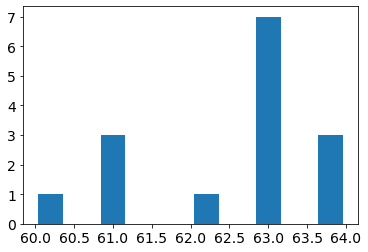

In [29]:
plt.hist(a, bin_edges, rwidth = 0.8)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [30]:
a.size

15

In [31]:
x = a
probs = hist / x.size

In [35]:
probs

array([0.06666667, 0.        , 0.2       , 0.        , 0.        ,
       0.06666667, 0.        , 0.46666667, 0.        , 0.2       ])

In [32]:
binned_entropy(a, 10)

1.3605138827424867

tsfresh를 통해서 나온 값과 비교했을 때 같은 값이 나오는 것을 볼 수 있다

In [33]:
X3 = extract_features(df2, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)

Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 114.15it/s]


In [34]:
X3

,F_z__binned_entropy__max_bins_10
1,1.360514
